In [68]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import HDBSCAN, KMeans
import matplotlib.pyplot as plt

In [69]:
# Georrferenced dataset
df = pd.read_csv("dataset_pisa.csv")
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.lon,df.lat), crs="EPSG:4326")
start_x, start_y, end_x, end_y = gdf.total_bounds

In [70]:
%%capture
fig, ax = plt.subplots(figsize=(10, 10))
start_x, start_y, end_x, end_y = gdf.total_bounds
ax.set_xlim(start_x-0.01, end_x+0.01)
ax.set_ylim(start_y-0.01, end_y+0.01)

#### Testing the clustering with different minimum_size values

In [ ]:
def test_different_sizes(start, end, algorithm, algorithm_args):
    results = []
    all_clusterings = pd.DataFrame()
    for i in range(start, end):
        clustering = algorithm(**algorithm_args).fit(gdf[['lat','lon']])
        all_clusterings[i] = clustering.labels_
        total_clusters = len(set(clustering.labels_))-1
        no_outliers_df = all_clusterings[all_clusterings[i] != -1]
        avarage_cluster_size = no_outliers_df[i].value_counts().mean()
        standard_deviation = no_outliers_df[i].value_counts().std()
        max_cluster_size = no_outliers_df[i].value_counts().max()
        min_cluster_size = no_outliers_df[i].value_counts().min()
        results.append([i, total_clusters, avarage_cluster_size, standard_deviation, min_cluster_size, max_cluster_size])
    return all_clusterings, pd.DataFrame(results, columns=['min_cluster_size', 'total_clusters', 'avarage_cluster_size', 'standard_deviation', 'min_cluster_size', 'max_cluster_size'])

In [71]:
results = []
all_clustering = pd.DataFrame()
for i in range(2, 50):
    hdb = HDBSCAN(min_cluster_size=i)
    cluster = hdb.fit(gdf[["lat", "lon"]])
    gdf["cluster"] = cluster.labels_
    all_clustering[i] = cluster.labels_
    
    # Information on the minimum size choice
    total_clusters = len(set(gdf["cluster"]))-1
    avarage_cluster_size = gdf[gdf["cluster"] != -1].cluster.value_counts().mean()
    standard_deviation = gdf[gdf["cluster"] != -1].cluster.value_counts().std()
    max_cluster_size = gdf[gdf["cluster"] != -1].cluster.value_counts().max()
    size_info = (i, total_clusters, max_cluster_size, avarage_cluster_size, standard_deviation)
    results.append(size_info)

cluster_info = [
    "min_cluster_size",
    "total_clusters",
    "max_cluster_size",
    "avarage_cluster_size",
    "standard_deviation"
    ]
df = pd.DataFrame(results, columns=cluster_info)

In [72]:
cluster_info = [
    "min_cluster_size",
    "total_clusters",
    "max_cluster_size",
    "avarage_cluster_size",
    "standard_deviation"
    ]
df = pd.DataFrame(results, columns=cluster_info)

In [73]:
df.head()

,min_cluster_size,total_clusters,max_cluster_size,avarage_cluster_size,standard_deviation
0,2,816,346,4.28,13.35
1,3,439,349,7.37,18.19
2,4,286,348,10.73,22.37
3,5,220,348,13.14,25.21
4,6,171,348,16.12,28.50


In [74]:
new_df = df[df["total_clusters"] < 50]
new_df

,min_cluster_size,total_clusters,max_cluster_size,avarage_cluster_size,standard_deviation
14,16,46,348,51.72,53.09
15,17,44,348,54.14,54.92
16,18,40,384,58.75,60.99
17,19,39,383,59.79,61.09
18,20,38,382,60.76,61.80
19,21,34,381,64.50,63.76
20,22,33,381,64.27,64.08
21,23,31,428,68.10,72.78
22,24,28,426,76.68,74.38
23,25,27,419,77.78,73.99


The standard deviation is so high😭

<Axes: >

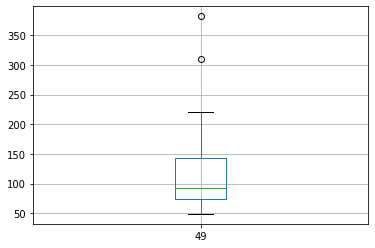

In [75]:
pd.DataFrame(all_clustering[all_clustering[49] != -1][49].value_counts()).boxplot()

Trying with K-means clustering

In [ ]:
all_kmeans_clusterings = pd.DataFrame()
for i in range(10, 30):
    kmeans = KMeans(n_clusters=i)
    cluster = kmeans.fit(gdf[["lat", "lon"]])
